In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
%matplotlib inline

In [2]:
customer_data = pd.read_csv('BlackFriday.csv')

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# Checking for Null Values

In [34]:
cat_2 = customer_data['Product_Category_2'].value_counts().sum()
cat_2

370591

In [28]:
(len(customer_data) - cat_2)/len(customer_data)*100

31.06271287648095

In [29]:
cat_3 = customer_data['Product_Category_3'].value_counts().sum()

In [30]:
(len(customer_data) - cat_3)/len(customer_data)*100

69.44102891306734

#### Dropping Null Columns as they have more than 5% missing values.

In [4]:
customer_data = customer_data.drop(columns=['Product_Category_2', 'Product_Category_3'], axis=1)

### Creating a Primary-Key based on 'User_ID' and 'Product_ID'

In [7]:
customer_data.User_ID.nunique()

5891

In [8]:
customer_data.Product_ID.nunique()

3623

In [5]:
user = customer_data['User_ID'].astype('str') 

In [6]:
product = customer_data['Product_ID'].astype('str')

In [7]:
customer_data['Unique_ID'] = user +' ' + product

In [5]:
# Dropping 'User_ID' and 'Product_ID' columns

customer_data = customer_data.drop(columns=['User_ID', 'Product_ID'], axis=1)

In [9]:
customer_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Unique_ID
0,F,0-17,10,A,2,0,3,8370,1000001 P00069042
1,F,0-17,10,A,2,0,1,15200,1000001 P00248942
2,F,0-17,10,A,2,0,12,1422,1000001 P00087842
3,F,0-17,10,A,2,0,12,1057,1000001 P00085442
4,M,55+,16,C,4+,0,8,7969,1000002 P00285442


In [17]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,537577.0,8.082710,6.524120,0.0,2.0,7.0,14.0,20.0
Marital_Status,537577.0,0.408797,0.491612,0.0,0.0,0.0,1.0,1.0
Product_Category_1,537577.0,5.295546,3.750701,1.0,1.0,5.0,8.0,18.0
Purchase,537577.0,9333.859853,4981.022133,185.0,5866.0,8062.0,12073.0,23961.0


#### Finding the range of Purchase

In [22]:
print(customer_data.Purchase.quantile(q=0.25))
print(customer_data.Purchase.quantile(q=0.5))
print(customer_data.Purchase.quantile(q=0.75))

5866.0
8062.0
12073.0


In [6]:
customer_data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [34]:
pd.DataFrame(customer_data, columns= ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase', 'Unique_ID']).to_csv('Customer_Data.csv')

### Re Enter the data

In [9]:
customer_data = pd.read_csv('Customer_Data.csv')

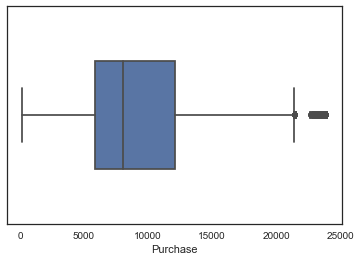

In [10]:
sns.boxplot(x = customer_data['Purchase'], width=0.5)

- Outliers exist in the Purchase Column

In [11]:
#### Outliers

customer_data.describe().T

q3 = np.quantile(a=customer_data.Purchase, q=0.75)
q1 = np.quantile(a=customer_data.Purchase, q=0.25)
iqr = q3 - q1
1.5*iqr

print('No of Outliers:',len(customer_data['Purchase'][customer_data['Purchase'] > (q3 + (1.5*iqr))]))

No of Outliers: 2665


## Purchase Distribution

C:\Users\IQbal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IQbal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


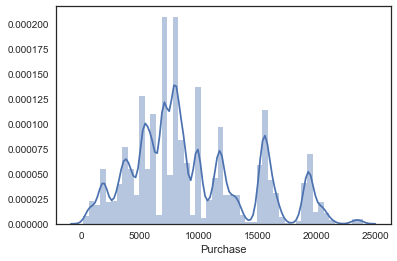

In [40]:
sns.distplot(customer_data['Purchase'])

In [11]:
skewness = (3*(customer_data['Purchase'].mean() - customer_data['Purchase'].median()))/(customer_data['Purchase'].std())

In [13]:
skewness

## Since skewness is positive, Hence right skewed.

0.7660234097113452

In [12]:
customer_data['sqrt'] = np.sqrt(customer_data['Purchase'])

In [13]:
customer_data['invSqrt'] = 1/ (np.sqrt(customer_data['Purchase']))

In [14]:
customer_data['log'] = np.log(customer_data['Purchase'])

In [15]:
skew_sqrt = (3*(customer_data['sqrt'].mean() - customer_data['sqrt'].median()))/(customer_data['sqrt'].std())

In [16]:
skew_inv = (3*(customer_data['invSqrt'].mean() - customer_data['invSqrt'].median()))/(customer_data['invSqrt'].std())

In [17]:
skew_log = (3*(customer_data['log'].mean() - customer_data['log'].median()))/(customer_data['log'].std())

In [18]:
print(skew_sqrt,'\n',skew_inv,'\n', skew_log)

0.35657075653136916 
 0.5030804714946393 
 -0.11491516838990029


In [19]:
from scipy import stats

In [20]:
x1 = customer_data['sqrt']

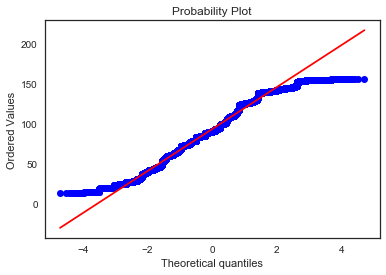

In [21]:
res = stats.probplot(x=x1, plot= plt)

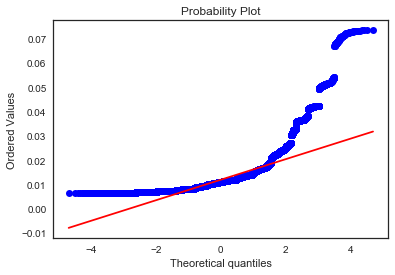

In [26]:
x2 = customer_data['invSqrt']

res2 = stats.probplot(x=x2, plot=plt)

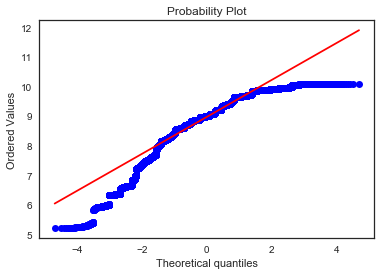

In [22]:
x3 = customer_data['log'] 

res3 = stats.probplot(x=x3, plot=plt)

#### Observation:
- The 'sqrt' transformation seems to be the best.

In [8]:
customer_data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

## ANOVA of Purchase based on
   - Gender
   - City Category
   - Marital Status

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [28]:
modelGender = ols(formula= 'Purchase ~ C(Gender)', data=customer_data[0:10000]).fit()

aov_table = anova_lm(modelGender, type = 2)
print(aov_table)

               df        sum_sq       mean_sq          F        PR(>F)
C(Gender)     1.0  1.123042e+09  1.123042e+09  47.346759  6.304179e-12
Residual   9998.0  2.371477e+11  2.371952e+07        NaN           NaN


In [12]:
if aov_table['PR(>F)'][0] <0.05:
    print("The means are not equal, apply TUKEY-KRAMER's Test")
else:
    print("The means are equal")

The means are not equal, apply TUKEY-KRAMER's Test


In [13]:
mcGender = MultiComparison(customer_data.Purchase, customer_data.Gender)

In [14]:
result = mcGender.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  F      M    695.0104 664.1457 725.875  True 
----------------------------------------------


In [22]:
print(customer_data[customer_data['Gender'] == 'M']['Purchase'].mean())
print(customer_data[customer_data['Gender'] == 'F']['Purchase'].mean())

9504.771712960679
8809.761348593387


# City_Category

In [26]:
modelCity = ols(formula= 'Purchase ~ C(City_Category)', data=customer_data[0:10000]).fit()

aov_table = anova_lm(modelCity, type = 2)
print(aov_table)

                      df        sum_sq       mean_sq          F        PR(>F)
C(City_Category)     2.0  1.763421e+09  8.817105e+08  37.269283  7.485133e-17
Residual          9997.0  2.365074e+11  2.365783e+07        NaN           NaN


In [16]:
if aov_table['PR(>F)'][0] <0.05:
    print("The means are not equal, apply TUKEY-KRAMER's Test")
else:
    print("The means are equal")

The means are not equal, apply TUKEY-KRAMER's Test


In [18]:
mcCity = MultiComparison(customer_data.Purchase, customer_data.City_Category)
resultCity = mcCity.tukeyhsd(alpha=0.05)

print(resultCity)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  A      B    240.6468 201.4538 279.8399  True 
  A      C    886.4308 844.5732 928.2885  True 
  B      C    645.784  608.1905 683.3775  True 
-----------------------------------------------


In [30]:
print(customer_data[customer_data['City_Category'] == 'A']['Purchase'].mean())
print(customer_data[customer_data['City_Category'] == 'B']['Purchase'].mean())
print(customer_data[customer_data['City_Category'] == 'C']['Purchase'].mean())

8958.011013703177
9198.657848145418
9844.44185501604


# Marital Status

In [29]:
modelMarriage = ols(formula= 'Purchase ~ C(Marital_Status)', data=customer_data[0:10000]).fit()

aov_table = anova_lm(modelMarriage, type = 2)
print(aov_table)

                       df        sum_sq       mean_sq         F    PR(>F)
C(Marital_Status)     1.0  1.311806e+05  1.311806e+05  0.005504  0.940859
Residual           9998.0  2.382707e+11  2.383183e+07       NaN       NaN


In [20]:
if aov_table['PR(>F)'][0] <0.05:
    print("The means are not equal, apply TUKEY-KRAMER's Test")
else:
    print("The means are equal")

The means are equal
